# Regression Metrics and Loss Functions

We've seen two examples of _loss functions_ earlier in the week in the context of regularization.

For a model of the form $y = f(x) + \epsilon$ with predictions $\hat{y}_i$ and true values $y_i$, we have:

* The sum of squared errors:
$$\text{SSE} = \sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$
* A Regularlized version:
If our model parameters are $\theta_i$ and our regularization parameter is $\alpha$, then the loss function took the form:
$$\text{L} = \sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \theta_i}$$

In this lesson we're going to dig deeper into loss functions and their applications. Different loss functions are useful in different scenarios and there are two very popular loss functions that are used in conjuction with regression. In this case they are sometimes referred to as _regression metrics_.

The first is the _root mean squared error_ or _RMSE_ and it is the mean of the squared errors. If we have $n$ regression points and their predictions, the [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation) is:

$$\text{RMSE} = \sqrt{\frac{\sum_{i}{\left(\hat{y}_i - y_i \right)^2}}{n}}$$

The second is the _mean absolute error_ or _MAE_, and it differs by use of an absolute value instead of a square. The [MAE](https://en.wikipedia.org/wiki/Average_absolute_deviation) is:

$$\text{MAE} = \frac{\sum_{i}{|\hat{y}_i - y_i |}}{n}$$

## Why have different regression metrics?

You might be thinking, _what's all the fuss about_? It turns out that there are lots of good reasons to use different loss functions. We've seen one -- regularization -- and now we'll consider the effects of outliers on these two metrics.

First let's try a very simplified statistics problem. Given a dataset, how can we summarize it with a single number? Do you know any ways?

This is equivalent to fitting a constant model to the data. It turns out that the _mean_ minimizes the RMSE and the _median_ minimizes the MAE. By analogy, when fitting a model, MAE is more tolerant to outliers. In other words, the degree of error of an outlier has a large impact when using RMSE versus the MAE. Since the choice of loss function affects model fit, it's important to consider how you want errors to impact your models.

**Summary**
* Use MAE when how far off an error is makes little difference
* Use RMSE when more extreme errors should have a large impact

Finally, note that linear regressions with MAE instead of RMSE are called _least absolute deviation_ regressions rather than least squares regressions.

### Bonus: Modes

It turns out the _mode_ minimizes the sum:
$$\frac{\sum_{i}{|\hat{y}_i - y_i |^{0}}}{n}$$
where $0^0=0$ and $x^0=1$ otherwise. Can you see why?


# Guided practice

Let's compute the RMSE and the MAE for a sample data set. Let's say we had a quadratic function that we fit a line to:

In [74]:
xs = [-1, 0, 1, 2, 3]
ys = [x*x + 1 for x in xs] # true values
predictions = [2*x for x in xs]
print ys
print predictions

[2, 1, 2, 5, 10]
[-2, 0, 2, 4, 6]


First do the calculation by hand to see how large each term is
.

.

.

.

.

.

.

.

.

.

.


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print "RMSE:", mean_squared_error(ys, predictions)
print "MAE:", mean_absolute_error(ys, predictions)

RMSE: 6.8
MAE: 2.0


Now let's add an outlier to the data.

In [76]:
xs.append(4)
ys.append(17)
predictions.append(30)

print "RMSE:", mean_squared_error(ys, predictions)
print "MAE:", mean_absolute_error(ys, predictions)

RMSE: 33.8333333333
MAE: 3.83333333333


Notice that the impact on the RMSE was large, a factor of 8, versus the impact on the MAE with a factor of 2.5.

# Indepedent Practice

Let's explore two scenarios to obtain a better understanding of RMSE and MAE. First let's fit two models to the same set of data, the data above. To do the least mean absolute error we will use `statsmodels`.

In [77]:
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf

In [78]:
# Let's add a few more points
xs.append(2.5)
ys.append(17)

xs.append(1.5)
ys.append(-6)

In [79]:
df = pd.DataFrame(np.array([xs, ys]).transpose(), columns=["x", "y"])
df.columns = ["x", "y"]
mod = smf.quantreg('y ~ x', df)
res = mod.fit(q=.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.3600
Model:                       QuantReg   Bandwidth:                       19.62
Method:                 Least Squares   Sparsity:                        28.42
Date:                Thu, 10 Nov 2016   No. Observations:                    8
Time:                        04:44:39   Df Residuals:                        6
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0000      7.366      0.136      0.896       -17.023    19.023
x              3.0000      3.315      0.905      0.400        -5.111    11.111
==============================================================================
"""

This generated a fit of $y = 3 x + 1$. Let's see what a linear regression yields.

In [80]:
import statsmodels.api as sm

X = np.array(xs).transpose()
X = sm.add_constant(X)
# Fit and summarize OLS model
mod = sm.OLS(ys, X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     5.473
Date:                Thu, 10 Nov 2016   Prob (F-statistic):             0.0579
Time:                        04:44:40   Log-Likelihood:                -24.966
No. Observations:                   8   AIC:                             53.93
Df Residuals:                       6   BIC:                             54.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3844      3.282      0.117      0.911        -7.647     8.416
x1             3.4558      1.477      2.340      0.058        -0.159     7.070
==============================================================================
Omnibus:                        2.698   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                0.637
Skew:                          -0.688   Prob(JB):                        0.727
Kurtosis:                       3.141   Cond. No.                         3.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This yielded a fit of $y = 3.4558 x + 0.3844$.

### Exercise

Plot the data with both functions. Which do you think fits the data better?

In [96]:
f1 = lambda x: 3*x + 1
f2 = lambda x: 3.4558*x + 0.3844

In [97]:
f1s = [f1(x) for x in df["x"]] #MAE- with quantreg
f2s = [f2(x) for x in df["x"]] #MSE-with OLS

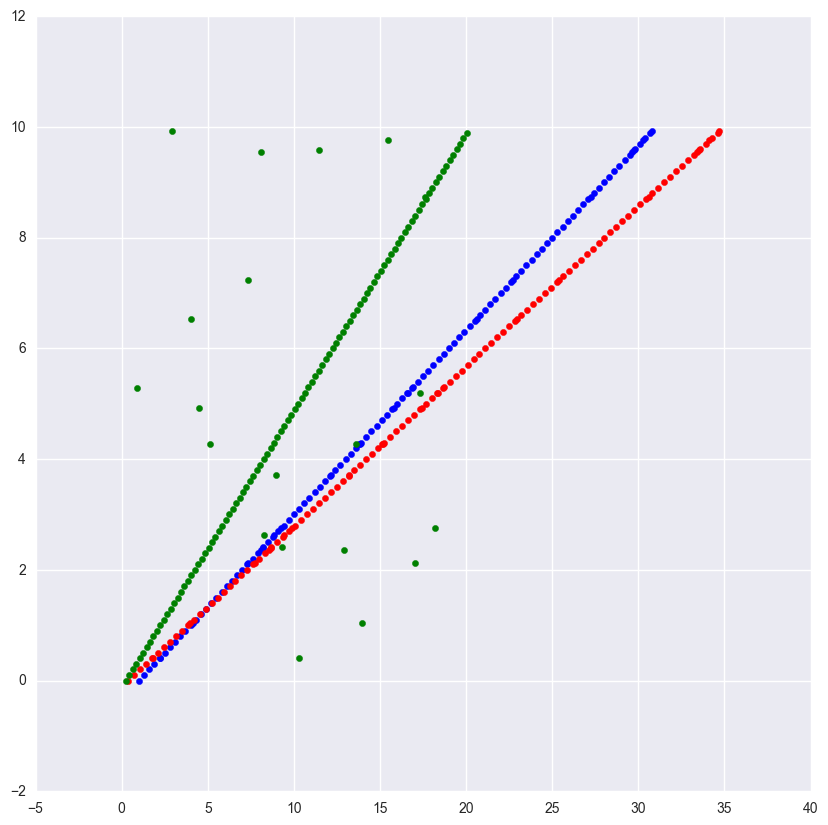

In [98]:
plt.scatter(f1s,df["x"],color='b')
plt.scatter(f2s,df["x"],color='r')
plt.scatter(df["y"],df["x"],color='g')
plt.show()

Finally, let's explore another scenario. Linear regression has five major assumptions, one of which is called _constant variance_ or _homoscedasticity_. It means that the errors are distributed with the same variance about the best fit line regardless of the value of the independent variables.

For example, a persistant level of background noise can cause regression metrics to be poorly estimated. Let's take a look.

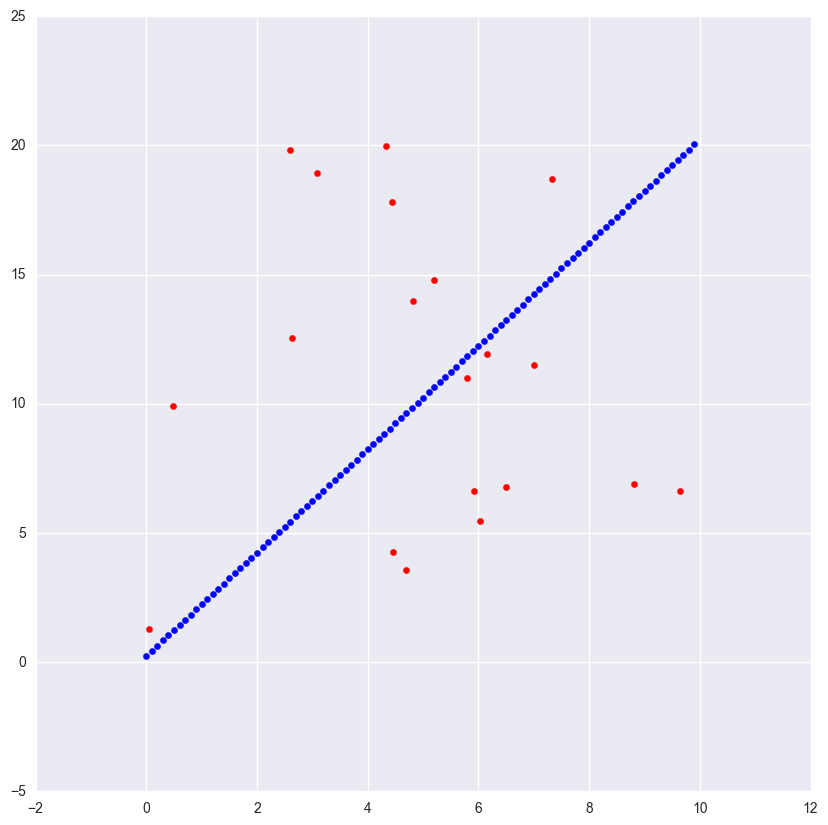

In [99]:
import random
from scipy.stats import norm
# Generate some data
xs = list(np.arange(0, 10, 0.1))
ys = [2*x + norm.pdf(0, 1) for x in xs]
# Add random background noise
xs2 = [10 * random.random() for i in range(20)]
ys2 = [20 * random.random() for i in range(20)]

# Plot the data sets
plt.scatter(xs, ys, color='b')
plt.scatter(xs2, ys2, color='r')
plt.show()

In [85]:
# Combine the data
xs.extend(xs2)
ys.extend(ys2)
df = pd.DataFrame(np.array([xs, ys]).transpose(), columns=['x', 'y'])

In [86]:
# Fit a line to the data
# Compute the RMSE and the MAE
# Plot the regression line

df.head(5)

,x,y
0,0.0,0.241971
1,0.1,0.441971
2,0.2,0.641971
3,0.3,0.841971
4,0.4,1.041971


In [87]:
# Fit and summarize OLS model
mod = sm.OLS(df["y"], sm.add_constant(df["x"]))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     231.3
Date:                Thu, 10 Nov 2016   Prob (F-statistic):           1.40e-29
Time:                        04:44:41   Log-Likelihood:                -313.51
No. Observations:                 120   AIC:                             631.0
Df Residuals:                     118   BIC:                             636.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.2708      0.602      3.771      0.000         1.078     3.463
x              1.5876      0.104     15.208      0.000         1.381     1.794
==============================================================================
Omnibus:                       26.885   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.858
Skew:                          -0.313   Prob(JB):                     1.09e-43
Kurtosis:                       9.259   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
predictions = res.predict()
predictions

array([  0.24197102,   0.44197101,   0.641971  ,   0.841971  ,
         1.04197099,   1.24197099,   1.44197098,   1.64197098,
         1.84197097,   2.04197096,   2.24197096,   2.44197095,
         2.64197095,   2.84197094,   3.04197093,   3.24197093,
         3.44197092,   3.64197092,   3.84197091,   4.0419709 ,
         4.2419709 ,   4.44197089,   4.64197089,   4.84197088,
         5.04197087,   5.24197087,   5.44197086,   5.64197086,
         5.84197085,   6.04197085,   6.24197084,   6.44197083,
         6.64197083,   6.84197082,   7.04197082,   7.24197081,
         7.4419708 ,   7.6419708 ,   7.84197079,   8.04197079,
         8.24197078,   8.44197077,   8.64197077,   8.84197076,
         9.04197076,   9.24197075,   9.44197075,   9.64197074,
         9.84197073,  10.04197073,  10.24197072,  10.44197072,
        10.64197071,  10.8419707 ,  11.0419707 ,  11.24197069,
        11.44197069,  11.64197068,  11.84197067,  12.04197067,
        12.24197066,  12.44197066,  12.64197065,  12.84

In [89]:
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import meanabs
print "rmse: ", rmse(predictions,ys)
print "mae:  ", meanabs(predictions,ys)

rmse:  3.29920573071
mae:   1.96786993704


In [90]:
# Now try a MAE regression with statsmodels and plot it.
# You should see a much better fit.

mod = smf.quantreg('y ~ x', df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.7445
Model:                       QuantReg   Bandwidth:                   2.701e-07
Method:                 Least Squares   Sparsity:                    7.078e-07
Date:                Thu, 10 Nov 2016   No. Observations:                  120
Time:                        04:44:41   Df Residuals:                      118
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2420    6.4e-08   3.78e+06      0.000         0.242     0.242
x              2.0000   1.11e-08    1.8e+08      0.000         2.000     2.000
==============================================================================
"""

In [108]:
predictions2 = res.predict()
print predictions2

[  0.24197102   0.44197101   0.641971     0.841971     1.04197099
   1.24197099   1.44197098   1.64197098   1.84197097   2.04197096
   2.24197096   2.44197095   2.64197095   2.84197094   3.04197093
   3.24197093   3.44197092   3.64197092   3.84197091   4.0419709
   4.2419709    4.44197089   4.64197089   4.84197088   5.04197087
   5.24197087   5.44197086   5.64197086   5.84197085   6.04197085
   6.24197084   6.44197083   6.64197083   6.84197082   7.04197082
   7.24197081   7.4419708    7.6419708    7.84197079   8.04197079
   8.24197078   8.44197077   8.64197077   8.84197076   9.04197076
   9.24197075   9.44197075   9.64197074   9.84197073  10.04197073
  10.24197072  10.44197072  10.64197071  10.8419707   11.0419707
  11.24197069  11.44197069  11.64197068  11.84197067  12.04197067
  12.24197066  12.44197066  12.64197065  12.84197064  13.04197064
  13.24197063  13.44197063  13.64197062  13.84197062  14.04197061
  14.2419706   14.4419706   14.64197059  14.84197059  15.04197058
  15.2419705

In [92]:
# Plot the data and the two fits

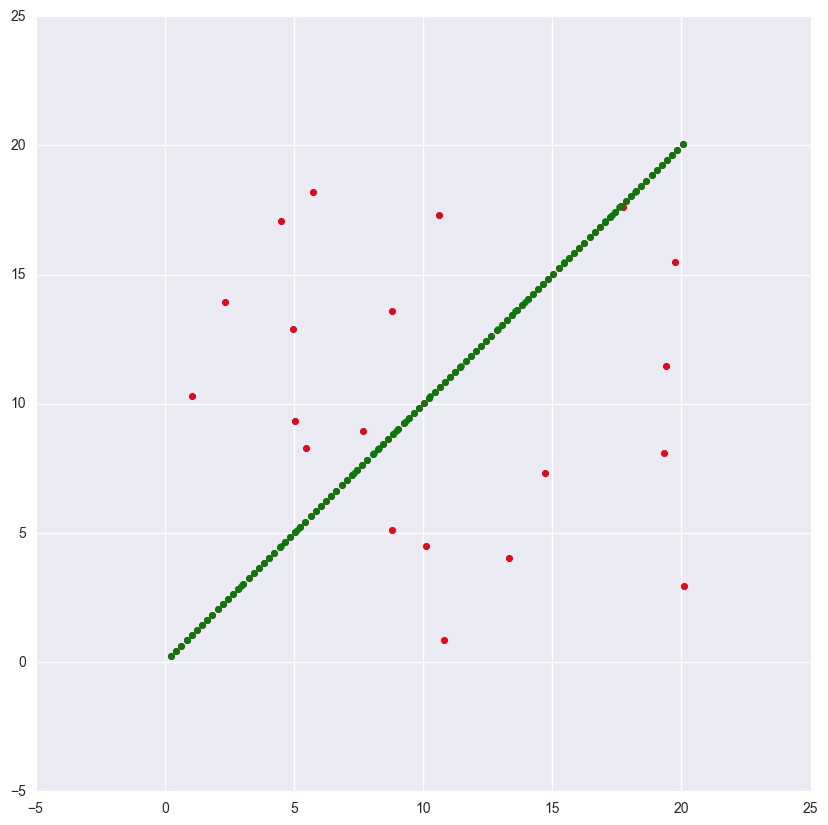

In [111]:
plt.scatter(predictions, df["y"], color='b') # ols
plt.scatter(predictions2, df["y"], color='r') # quantile
plt.scatter(df["y"], df["y"], color='g') # original
plt.show()

In [94]:
np.array([[1,2]]).transpose()


array([[1],
       [2]])

In [95]:
x=[1,2]
np.array(x).transpose()

array([1, 2])